# Author : Vishal Meharwade

Intern at **OASIS** **INFOBYTE**

***Task - 3***

**Project Title: Car Price Prediction**

Problem Statement:

  The price of a car depends on a lot of factors like goodwill of the brand of the car, feature of a car, Horsepower, and mileage and many more.
  Car price prediction is one of the major research areas in machine learning.

# **Importing Modules**

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

Loading the Dataset

In [52]:
df = pd.read_csv('/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


*    Checking missing values
*    Checking Duplicates
*    Checking type of datatype
*   Number of unique values
*   Statistics of dataset
*   Various categories present in different categorical column.



In [53]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [54]:
df.duplicated().sum()

2

Here in the dataset we've came across some duplicate values so we need to remove those duplicate values from the data.

Here we're plotting a graph for number of duplicated values and non-duplicated values are present in the dataset.

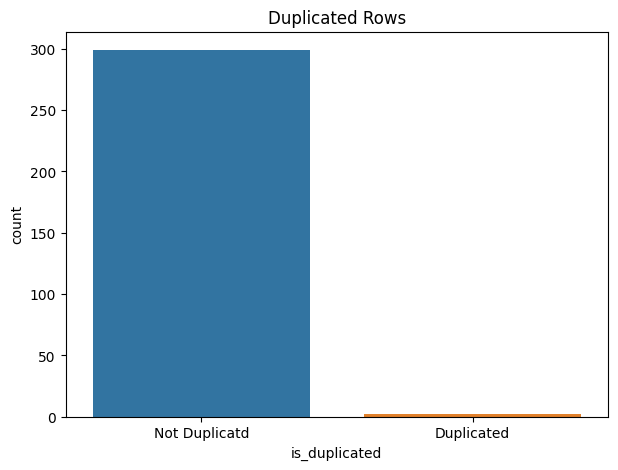

In [59]:
df['is_duplicated'] = df.duplicated()

plt.figure(figsize=(7, 5))
sns.countplot(x='is_duplicated', data = df)
plt.xlabel('is_duplicated')
plt.ylabel('count')
plt.title('Duplicated Rows')
plt.xticks([0, 1], ['Not Duplicatd', 'Duplicated'])

plt.show()

#df.drop(columns=['is_duplicated'], inplace = True)

In [60]:
df = df.drop_duplicates(subset=['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'])
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,is_duplicated
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,False
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,False
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,False
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,False
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,False
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,False
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,False
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,False
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,False


In [61]:
df.duplicated().sum()

0

In [62]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
is_duplicated      1
dtype: int64

In [63]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


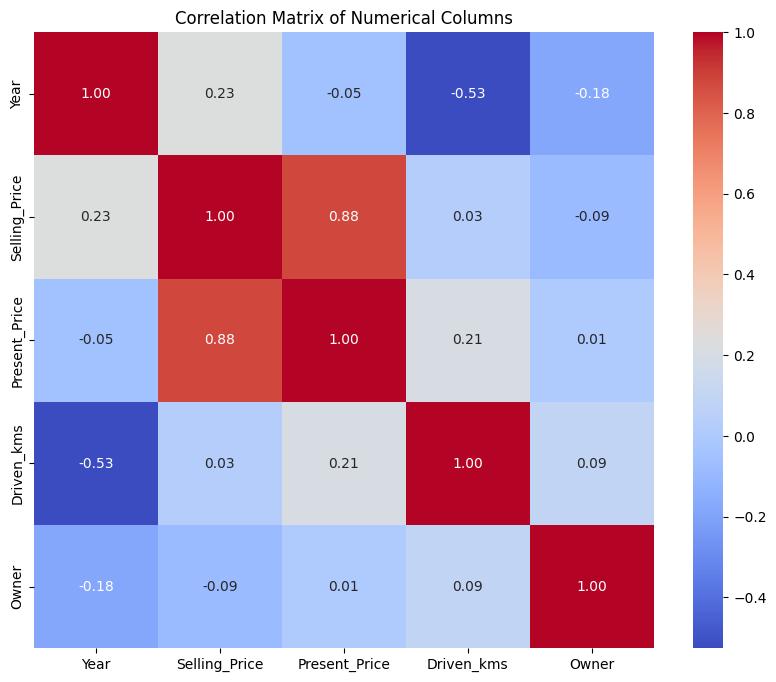

In [64]:
#selecting numerical columns:
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

#Create a Dataframe Containing only the numerical columns
numerical_df = df[numerical_columns]

#Calculating on correlation matrix for numeric columns
correlation_matrix = numerical_df.corr()

#Creating a HEATMAP
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")

plt.title('Correlation Matrix of Numerical Columns')
plt.show()

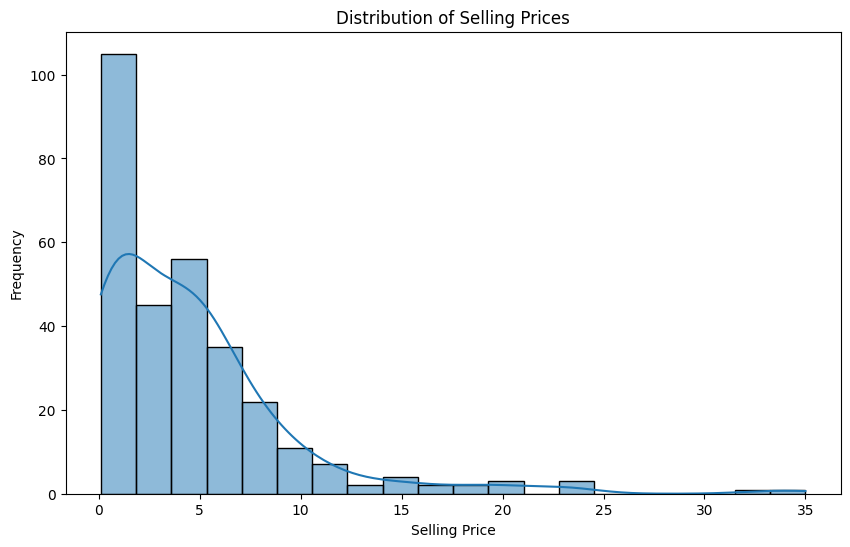

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

# Data Encoding:

**Checking the distributiion of categorical data**

In [70]:
print(df['Selling_type'].value_counts())
print("-------------------------------")

print(df['Fuel_Type'].value_counts())
print("-------------------------------")

print(df['Transmission'].value_counts())
print("-------------------------------")

Dealer        193
Individual    106
Name: Selling_type, dtype: int64
-------------------------------
Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
-------------------------------
Manual       260
Automatic     39
Name: Transmission, dtype: int64
-------------------------------


In [72]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [73]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,is_duplicated
0,ritz,2014,3.35,5.59,27000,0,0,0,0,False
1,sx4,2013,4.75,9.54,43000,1,0,0,0,False
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,False
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,False
4,swift,2014,4.60,6.87,42450,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0,False
297,brio,2015,4.00,5.90,60000,0,0,0,0,False
298,city,2009,3.35,11.00,87934,0,0,0,0,False
299,city,2017,11.50,12.50,9000,1,0,0,0,False


# Modelling:

In [74]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [75]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,is_duplicated
0,2014,5.59,27000,0,0,0,0,False
1,2013,9.54,43000,1,0,0,0,False
2,2017,9.85,6900,0,0,0,0,False
3,2011,4.15,5200,0,0,0,0,False
4,2014,6.87,42450,1,0,0,0,False
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0,False
297,2015,5.90,60000,0,0,0,0,False
298,2009,11.00,87934,0,0,0,0,False
299,2017,12.50,9000,1,0,0,0,False


In [76]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

Evaluation and Visualization :

Step 1: Splitting the dataset into Training and Testing Datasets

Here we have taken test data size of 30percent and to train the data we've taken 70 percent of data.

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

Step 2 : Selecting the model

In [78]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Step 3: Evaluating the model

In [79]:
y_pred = model.predict(X_test)

In [80]:
y_pred

array([ 6.4381598 , -1.75280901,  7.71296496,  5.51843608,  3.07563186,
        1.38737327,  6.6031138 ,  5.61196885, 13.94661975,  1.91186137,
        4.65713458,  8.11958843,  0.6097037 ,  3.34924533,  2.9292526 ,
        4.78557981,  3.8257514 ,  9.52849857,  5.08899782,  7.59652975,
       -2.8621606 ,  1.61938498,  1.93243956,  1.02068352,  5.63511499,
        1.17190438, -7.38985077,  6.23126655,  8.60194024,  5.17887589,
        9.90776499, 10.16569991,  7.66737565,  0.61769663,  4.98872541,
        0.27282247,  1.85246155, -2.20694982,  5.17657984,  8.94519788,
        6.41701733,  7.58677552, 16.30455205,  6.67969346,  4.91428878,
        1.28032727,  4.45557887,  5.86529859,  7.0460885 ,  2.93728236,
        6.11488033,  4.57121497, -1.07218224,  1.60755022,  9.12371586,
        9.79810372,  0.32123788,  4.04637109,  7.40168945,  2.97307482,
        0.79726857,  0.40978378, 21.03162528,  4.53266154,  5.66526173,
        6.55804078,  4.56013387,  1.30199835,  5.44268751,  0.52

Calculating the performance of the metrices

In [81]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R-Squred (R2): {r2:.2f}")

 Mean Squared Error (MSE): 4.61
 R-Squred (R2): 0.81


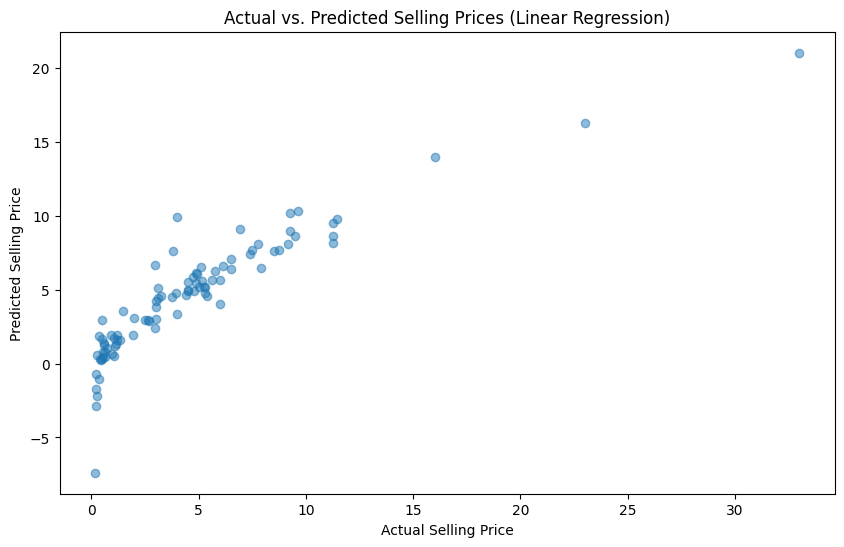

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()

Model building using Random Forest Regression

In [83]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=0)

# Fit the model to the training data
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
rf_Y_pred = rf_model.predict(X_test)

# Calculate performance metrics for the Random Forest model
rf_mse = mean_squared_error(Y_test, rf_Y_pred)*100
rf_r2 = r2_score(Y_test, rf_Y_pred)*100

print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

Random Forest Mean Squared Error (MSE): 226.73
Random Forest R-squared (R2): 90.63


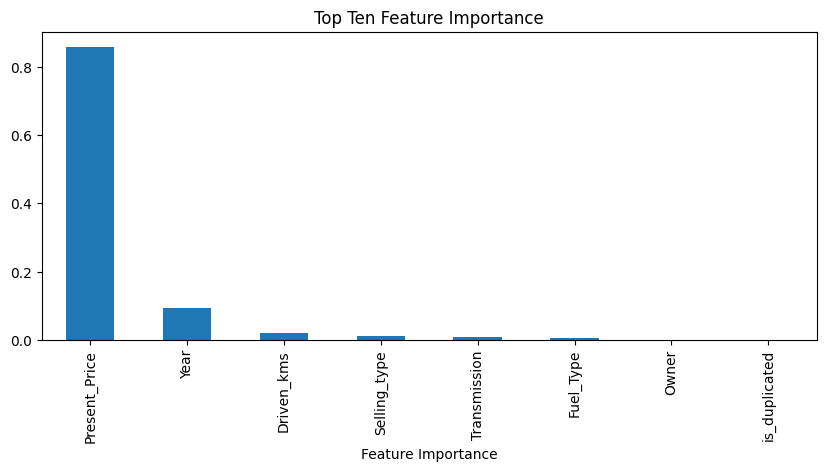

In [84]:
feature_importance = pd.Series(rf_model.feature_importances_, index = X.columns)
plt.figure(figsize=(10,4))
feature_importance.nlargest(10).plot(kind = 'bar')
plt.xlabel('Feature Importance')
plt.title('Top Ten Feature Importance')
plt.show()